# Chapter 3: Working with Quadratic Unconstrained Binary Optimization Problems

In [18]:
from qiskit import *
from qiskit.quantum_info import Statevector, Operator, Pauli
from qiskit.opflow.primitive_ops import PauliOp
from qiskit.opflow import I, Z
import numpy as np

## Computing expectation values with Qiskit

Initial codes defining states

In [19]:
zero = Statevector([1,0])
print('zero is', zero)

one = Statevector([0,1])
print('one is',one)

zero is Statevector([1.+0.j, 0.+0.j],
            dims=(2,))
one is Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


In [20]:
zero = Statevector.from_int(0, dims = 2)
one = Statevector.from_int(1, dims = 2)

print('zero is',zero)
print('one is',one)

zero is Statevector([1.+0.j, 0.+0.j],
            dims=(2,))
one is Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


We can use `tensor` to construct states with more qubits. Let's see the state $\vert 100 \rangle$, witch correspondes to 4 in decimal basis:

In [21]:
psi = one.tensor(zero.tensor(zero))
print('psi is',psi)

psi is Statevector([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))


To write the states in LaTex representation, we can use `.draw('latex')`:

In [22]:
psi = one^zero^zero
psi.draw('latex')

<IPython.core.display.Latex object>

We can write $ \vert \psi \rangle$ in a more pratical way using:

In [23]:
psi = Statevector.from_int(4, dims = 2**3)
psi.draw('latex')

<IPython.core.display.Latex object>

We can writte states in superposition as:

In [24]:
ghz = 1/np.sqrt(2)*(zero^zero^zero) + 1/np.sqrt(2)*(one^one^one)
ghz

#It seems the .draw('latex') does not give us the right representation of this state

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.70710678+0.j],
            dims=(2, 2, 2))


Now we will see how to represent Operators in qiskit. Furthermore, we will see how to represent the conection in a graph using Pauli Matrices

In [25]:
Z0Z1 = Pauli("ZZI")
print("Z0Z1 is",Z0Z1)
print("And its matrix is")
print(Z0Z1.to_matrix())

Z0Z1 is ZZI
And its matrix is
[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  1.+0.j]]


In [26]:
print("The sparse representation of Z0Z1 is")
print(Z0Z1.to_matrix(sparse=True))

The sparse representation of Z0Z1 is
  (0, 0)	(1+0j)
  (1, 1)	(1+0j)
  (2, 2)	(-1+0j)
  (3, 3)	(-1+0j)
  (4, 4)	(-1+0j)
  (5, 5)	(-1+0j)
  (6, 6)	(1+0j)
  (7, 7)	(1+0j)


We can also creat the same operator using a diferente comand. When constructing a Pauli object, we can also specify which positions of the tensor product are Z matrices, passing them as a vector of ones (indicating the presence of
Z) and zeroes (indicating the absence of Z or, equivalently, the presence of I). Since the construction method is more general and it can be used to create other tensor products, we would need to specify another vector with positions of X matrices, which we will set to all zeroes for the moment.


In [27]:
Z0Z1 = Pauli(([0,1,1],[0,0,0]))
print(Z0Z1.to_matrix())

[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  1.+0.j]]


Let's now solve the max cut problem defining the Hamiltonian as Pauli Operators.

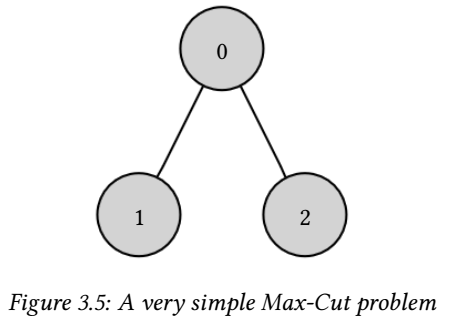

In [28]:
H_cut = PauliOp(Pauli("IZZ")) + PauliOp(Pauli("ZIZ"))
print("H_cut is")
print(H_cut)
print("The sparse representation of H_cut is")
print(H_cut.to_spmatrix())

H_cut is
1.0 * IZZ
+ 1.0 * ZIZ
The sparse representation of H_cut is
  (0, 0)	(2+0j)
  (1, 1)	(-2+0j)
  (6, 6)	(-2+0j)
  (7, 7)	(2+0j)


A more compact way of obtaining the same Hamiltonian is:

In [29]:
from qiskit.opflow import I, Z
H_cut = (Z^Z^I) + (Z^I^Z)
print("H_cut is")
print(H_cut)

H_cut is
1.0 * ZZI
+ 1.0 * ZIZ


Of course, more complicated Hamiltonians, even including coefcients, can be constructed. 
For exemple, $H = -1/2Z_0Z1 + 2Z_0Z_2 - Z_1Z_2 +Z_1 - 5Z_1$

In [30]:
H_ising = -0.5*(Z^Z^I) + 2*(Z^I^Z) -(I^Z^Z) + (I^Z^I) -5*(I^I^Z)
H_ising

PauliSumOp(SparsePauliOp(['ZZI', 'ZIZ', 'IZZ', 'IZI', 'IIZ'],
              coeffs=[-0.5+0.j,  2. +0.j, -1. +0.j,  1. +0.j, -5. +0.j]), coeff=1.0)

Now we can compute the expectation value of H_cut as difined $\langle \psi \vert H\_cut \vert \psi \rangle$

In [31]:
print("The expectation value is", psi.expectation_value(H_cut))

The expectation value is (-2+0j)


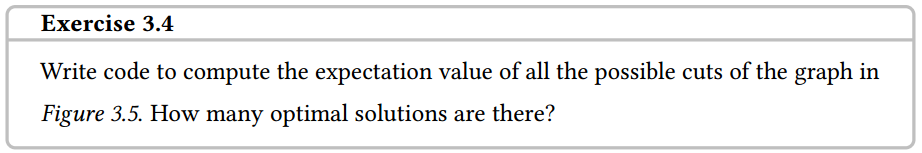

In [32]:
# Número de qubits
num_qubits = 3
H = (Z^Z^I) + (Z^I^Z)
expected_value = []
binary_str = []

for i in range(2**num_qubits):
    #Decimal to Binary
    binary_str.append(bin(i)[2:].zfill(num_qubits))  
    state = Statevector.from_int(i, dims = 2**num_qubits)
    #Computing the expected value using the formal definition
    expected_value.append(state.inner(state.evolve(H)))
    print("The expected value of state |{}> is".format(binary_str[i]), (expected_value[i]).real)
    
#Posições com o menor valor
max_cut = np.where(expected_value == np.min(expected_value))[0]

for i in range(len(max_cut)):
    print(' \n Therefore, the optimal cut is |{}>'.format(binary_str[max_cut[i]]))

The expected value of state |000> is 2.0
The expected value of state |001> is 0.0
The expected value of state |010> is 0.0
The expected value of state |011> is -2.0
The expected value of state |100> is -2.0
The expected value of state |101> is 0.0
The expected value of state |110> is 0.0
The expected value of state |111> is 2.0
 
 Therefore, the optimal cut is |011>
 
 Therefore, the optimal cut is |100>
